In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import sys

sys.path.append('../src')
import pwa_cluster as pwac

In [2]:
%load_ext autoreload
%autoreload 2

# Loading Data from Experiment

In [3]:
filestem = '../../car_data_for_pwa/'
filename = filestem + 'csv/lmpc-9915.h5' #lmpc-9915.h5  rec-9915.h5

f = h5py.File(filename, 'r')

lmpc_data = {}

for key in f.keys():
    print(str(f[key]), key)
    if type(f[key]) == h5py._hl.dataset.Dataset:
        lmpc_data[key] = np.array(f[key])
    

<HDF5 dataset "c_Psi": shape (3, 2931), type "<f8"> c_Psi
<HDF5 dataset "c_Vx": shape (3, 2931), type "<f8"> c_Vx
<HDF5 dataset "c_Vy": shape (4, 2931), type "<f8"> c_Vy
<HDF5 dataset "cmd": shape (2, 2931), type "<f8"> cmd
<HDF5 dataset "coeffConst": shape (10000, 5, 2, 6), type "<f8"> coeffConst
<HDF5 dataset "coeffCost": shape (10000, 2, 6), type "<f8"> coeffCost
<HDF5 dataset "coeffX": shape (9, 2931), type "<f8"> coeffX
<HDF5 dataset "coeffY": shape (9, 2931), type "<f8"> coeffY
<HDF5 dataset "cost": shape (6, 2931), type "<f8"> cost
<HDF5 dataset "cpsi": shape (30, 3, 5000), type "<f8"> cpsi
<HDF5 dataset "curv": shape (9, 2931), type "<f8"> curv
<HDF5 dataset "cvx": shape (30, 3, 5000), type "<f8"> cvx
<HDF5 dataset "cvy": shape (30, 4, 5000), type "<f8"> cvy
<HDF5 dataset "eps_alpha": shape (30, 5000, 6), type "<f8"> eps_alpha
<HDF5 dataset "final_counter": shape (29,), type "<f8"> final_counter
<HDF5 dataset "input": shape (30, 2, 5000), type "<f8"> input
<HDF5 group "/lapStat

In [4]:
states = lmpc_data["state"]
inputs = lmpc_data["cmd"]
print(states.shape)

(7, 2931)


In [5]:
plt.figure(figsize=[10,10]);
for ind in range(states.shape[0]):
    plt.subplot(3,3,ind+1); plt.plot(states[ind], '.'); plt.title('state ' + str(ind))

plt.figure(figsize=[10,4]);
for ind in range(inputs.shape[0]):
    plt.subplot(1,2,ind+1); plt.plot(inputs[ind], '.'); plt.title('input ' + str(ind))

# shift control and state by one -- pick s (where in track) and v_x (speed)

# states: 0 vx, 1 vy, 2 yaw (psi) rate, 3 psi, 4 ey, 5 s, (low pass) filtered vx/acc
# TODO map method on ey and s
# inputs: acceleration, steering
# acceleration, speed, psi dot, vy (symmetric around vy pos or neg)

In [80]:
y.shape

(2930, 6)

In [6]:
# not using final state -- filtered version of first state
y = states[:-1,1:].T
z = np.vstack([states[:-1,:-1], inputs[:,:-1]]).T # to do: correct indexing on inputs?

In [7]:
nc_list = [10,15,20]
clusterings = []
for nc in nc_list:
    clustering = pwac.ClusterPWA.from_num_clusters(z, y, nc, z_cutoff=6)
    clusterings.append(clustering)


In [8]:

for clustering in clusterings:
    clustering.fit_clusters(verbose=True)



assigning datapoints to clusters
updating models
4.18689402327
assigning datapoints to clusters
updating models
1.45993440657
assigning datapoints to clusters
updating models
1.15370047422
assigning datapoints to clusters
updating models
1.1602003046
assigning datapoints to clusters
updating models
1.00874408675
assigning datapoints to clusters
updating models
0.983200013834
assigning datapoints to clusters
updating models
0.901072566423
assigning datapoints to clusters
updating models
0.690314533132
assigning datapoints to clusters
updating models
0.758822380222
assigning datapoints to clusters
updating models
0.714865518505
assigning datapoints to clusters
updating models
0.529268534918
assigning datapoints to clusters
updating models
0.385084227435
assigning datapoints to clusters
updating models
0.246295038253
assigning datapoints to clusters
updating models
0.205215033499
assigning datapoints to clusters
updating models
0.142445536945
assigning datapoints to clusters
updating mode

In [11]:
As, Bs, ds = pwac.get_PWA_Models(clusterings[0].thetas, 6, 2)

In [16]:
clusterings[0].thetas[0].shape


(9, 6)

In [20]:
centroids_first = []
cluster_labels_first = []
thetas_first = []

for clustering in clusterings:
    centroids_first.append(clustering.centroids.copy())
    cluster_labels_first.append(clustering.cluster_labels.copy())
    thetas_first.append(clustering.thetas.copy())


In [21]:
for clustering in clusterings:
    clustering.determine_polytopic_regions(verbose=True)

----------------------------------------------------------------------------
	SCS v1.2.6 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012-2016
----------------------------------------------------------------------------
Lin-sys: sparse-indirect, nnz in A = 421920, CG tol ~ 1/iter^(2.00)
eps = 1.00e-03, alpha = 1.50, max_iters = 2500, normalize = 1, scale = 1.00
Variables n = 26440, constraints m = 52740
Cones:	linear vars: 52740
Setup time: 1.40e-02s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 1.16e+00  5.11e+00  9.78e-01 -2.26e+01  2.26e+01  1.09e-14  1.23e-01 
   100| 1.38e-01  3.27e-01  1.33e-02  5.94e+00  6.11e+00  5.74e-16  3.71e+00 
   200| 1.12e-01  1.49e-01  1.16e-02  4.75e+00  4.87e+00  4.21e-15  7.98e+00 
   300| 1.00e-01  1.17e-01  1.71e-02  3.56e+00  3.70e

In [22]:
centroids = []
cluster_labels = []
thetas = []

for clustering in clusterings:
    centroids.append(clustering.centroids.copy())
    cluster_labels.append(clustering.cluster_labels.copy())
    thetas.append(clustering.thetas.copy())


In [23]:
y_ind = 0
z_ind = [5,0]

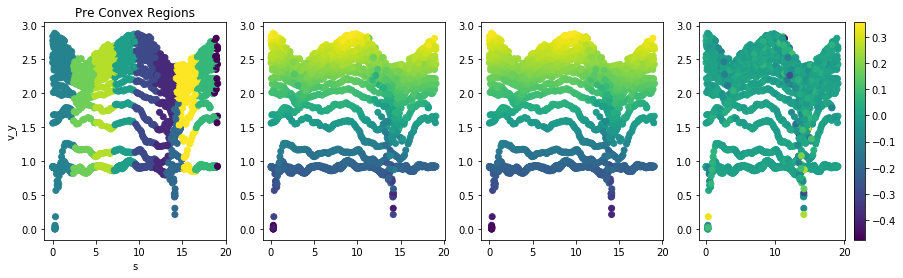

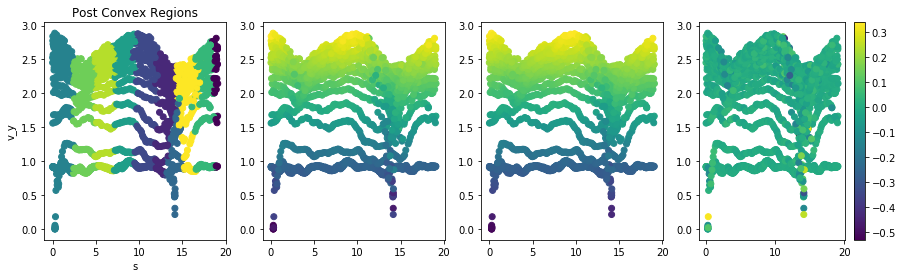

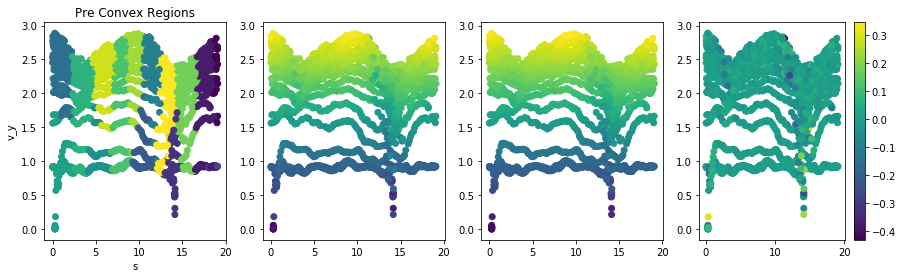

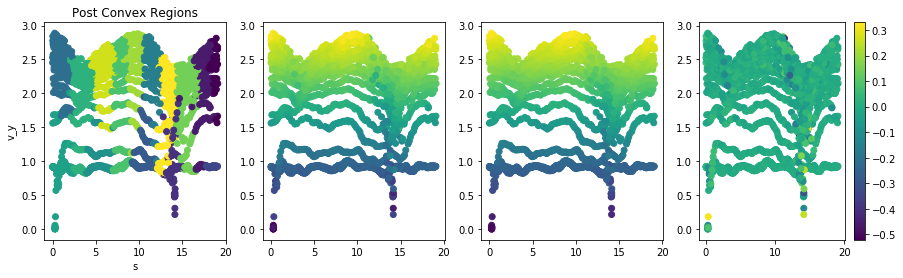

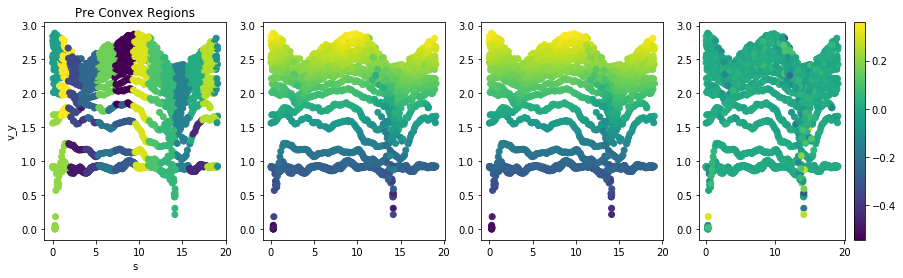

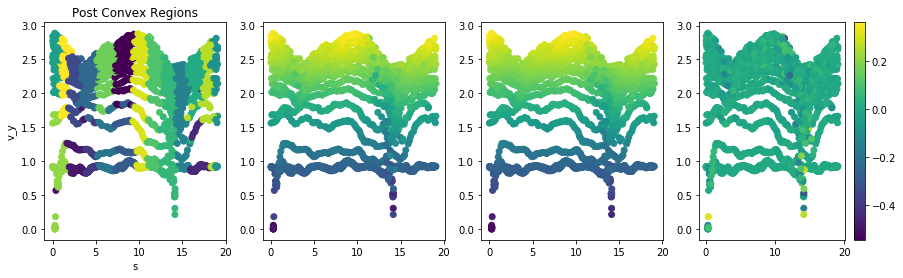

In [24]:
for j in range(len(nc_list)):
    yhats_ind = []; yhats = []
    yhats_ind_first = []; yhats_first = []

    for i in range(z.shape[0]):
        yhat = thetas[j][int(cluster_labels[j][i])].T.dot(np.hstack([z[i], 1]))
        yhat_first = thetas_first[j][int(cluster_labels_first[j][i])].T.dot(np.hstack([z[i], 1]))
        yhats_ind.append(yhat[y_ind]);yhats.append(yhat)
        yhats_ind_first.append(yhat_first[y_ind]);yhats_first.append(yhat_first)


    plt.figure(figsize=[15,4]); 
    plt.subplot(1,4,1)
    plt.title("Pre Convex Regions")
    plt.scatter(z[:,z_ind[0]], z[:,z_ind[1]], c=cluster_labels_first[j]); #plt.axis('equal'); plt.colorbar()
    plt.xlabel('s')
    plt.ylabel('v_y')
    plt.subplot(1,4,2)
    plt.scatter(z[:,z_ind[0]], z[:,z_ind[1]], c=y[:,y_ind]); #plt.axis('equal'); plt.colorbar()
    plt.subplot(1,4,3)
    #plt.imshow(yhat, interpolation='none', origin='lower',  extent=(min(x), max(x), min(x), max(x)))
    plt.scatter(z[:,z_ind[0]], z[:,z_ind[1]], c=yhats_ind_first); #plt.axis('equal'); plt.colorbar()
    plt.subplot(1,4,4)
    #plt.imshow(yhat, interpolation='none', origin='lower',  extent=(min(x), max(x), min(x), max(x)))
    plt.scatter(z[:,z_ind[0]], z[:,z_ind[1]], c=(y[:,y_ind]-yhats_ind_first));  plt.colorbar() #plt.axis('equal');


    plt.figure(figsize=[15,4]); 
    plt.subplot(1,4,1)
    plt.title("Post Convex Regions")
    plt.scatter(z[:,z_ind[0]], z[:,z_ind[1]], c=cluster_labels[j]); #plt.axis('equal'); plt.colorbar()
    plt.xlabel('s')
    plt.ylabel('v_y')
    plt.subplot(1,4,2)
    plt.scatter(z[:,z_ind[0]], z[:,z_ind[1]], c=y[:,y_ind]); #plt.axis('equal'); plt.colorbar()
    plt.subplot(1,4,3)
    #plt.imshow(yhat, interpolation='none', origin='lower',  extent=(min(x), max(x), min(x), max(x)))
    plt.scatter(z[:,z_ind[0]], z[:,z_ind[1]], c=yhats_ind); #plt.axis('equal'); plt.colorbar()
    plt.subplot(1,4,4)
    #plt.imshow(yhat, interpolation='none', origin='lower',  extent=(min(x), max(x), min(x), max(x)))
    plt.scatter(z[:,z_ind[0]], z[:,z_ind[1]], c=(y[:,y_ind]-yhats_ind));  plt.colorbar() #plt.axis('equal');

## One Step Prediction Error
The one step prediction error on this training data is:

In [108]:
prediction_errors_first = y - np.array(yhats_first)
prediction_errors = y - np.array(yhats)

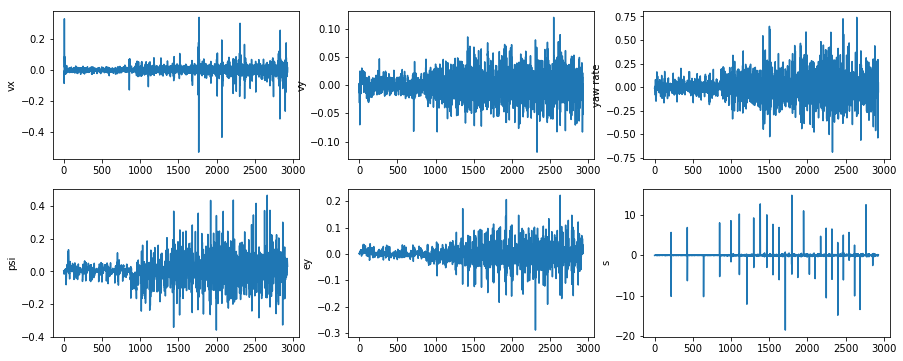

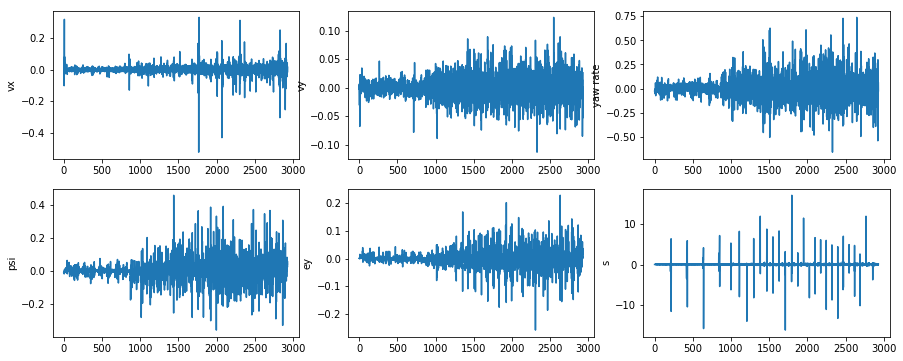

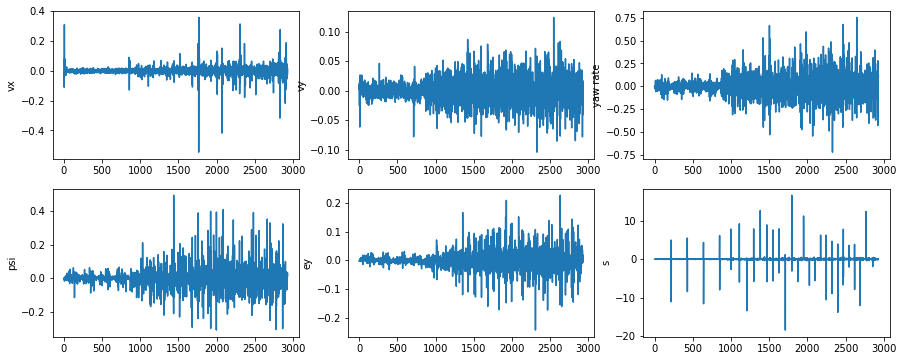

In [25]:
for j in range(len(nc_list)):
    yhats_ind = []; yhats = []
    yhats_ind_first = []; yhats_first = []

    for i in range(z.shape[0]):
        yhat = thetas[j][int(cluster_labels[j][i])].T.dot(np.hstack([z[i], 1]))
        yhat_first = thetas_first[j][int(cluster_labels_first[j][i])].T.dot(np.hstack([z[i], 1]))
        yhats_ind.append(yhat[y_ind]);yhats.append(yhat)
        yhats_ind_first.append(yhat_first[y_ind]);yhats_first.append(yhat_first)
    
    prediction_errors_first = y - np.array(yhats_first)
    prediction_errors = y - np.array(yhats)
        
    plt.figure(figsize=(15,6))
    nstates = prediction_errors.shape[1]
    state_names = ['vx', 'vy', 'yaw rate', 'psi', 'ey', 's']
    for state in range(nstates):
        plt.subplot(nstates/3, 3, state+1)
        plt.plot(prediction_errors[:,state])
        #plt.scatter(range(len(cluster_labels)), prediction_errors[:,state], c=cluster_labels)
        plt.ylabel(state_names[state])
    

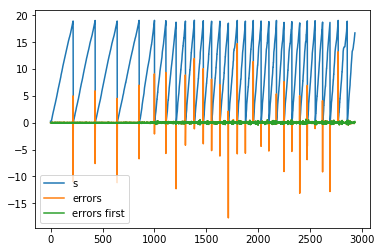

In [113]:
plt.figure(); 
plt.plot(z[:,5], label='s')
plt.plot(prediction_errors[:,5], label='errors')
plt.plot(prediction_errors_first[:,5], label='errors first')
plt.legend()

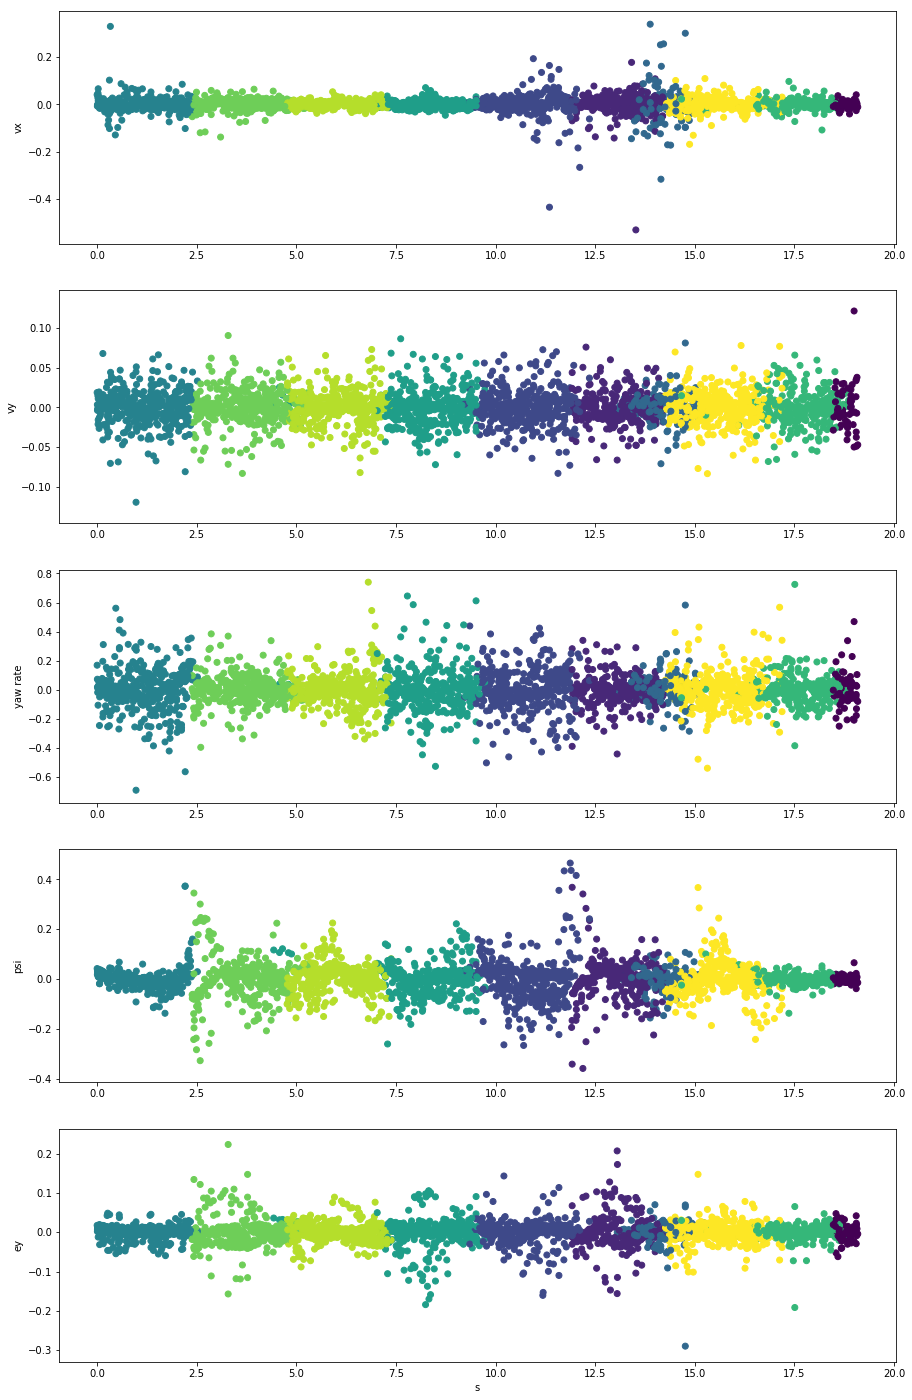

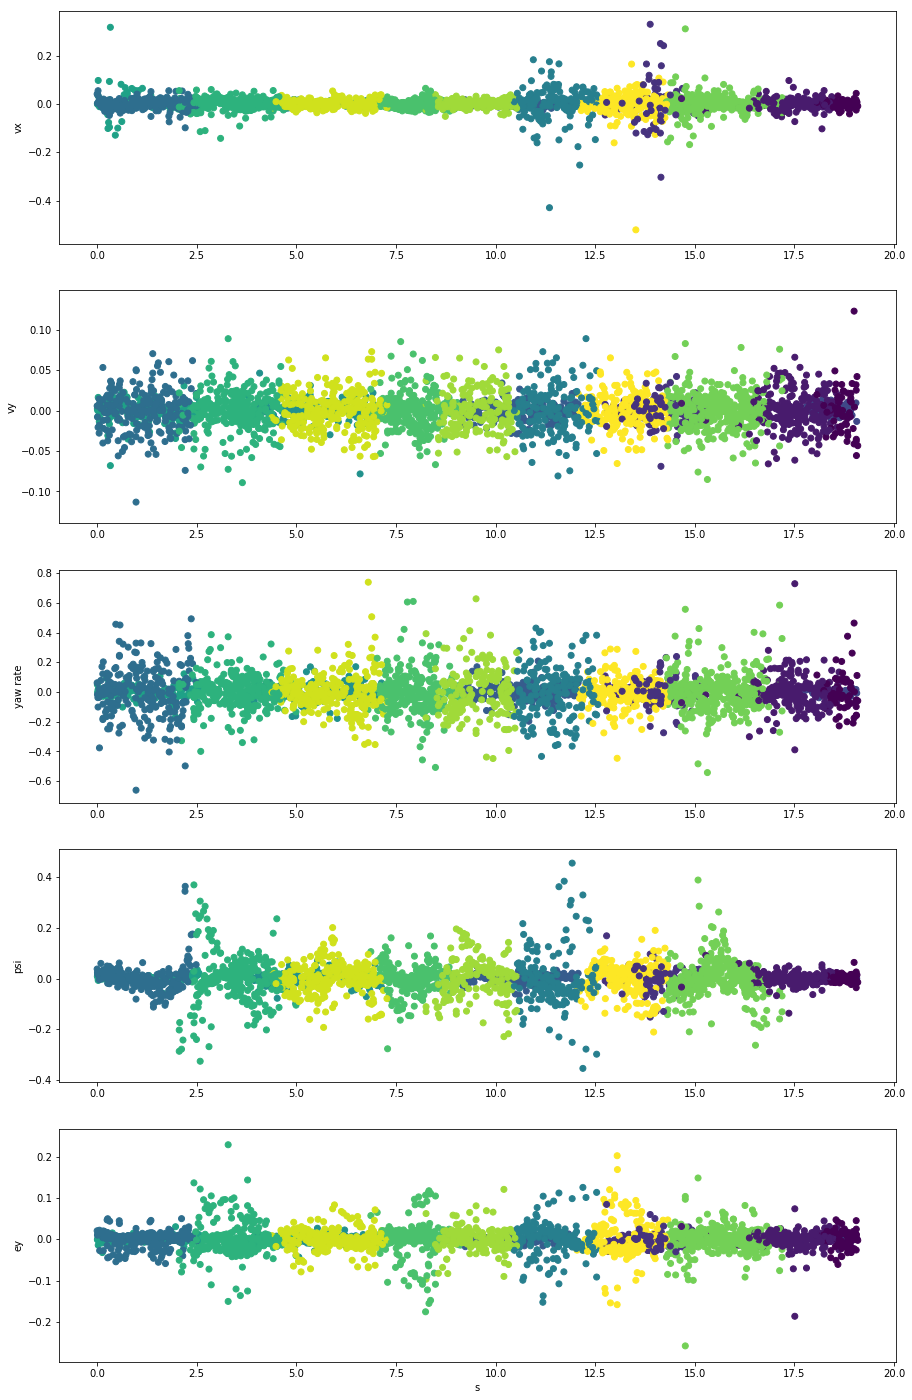

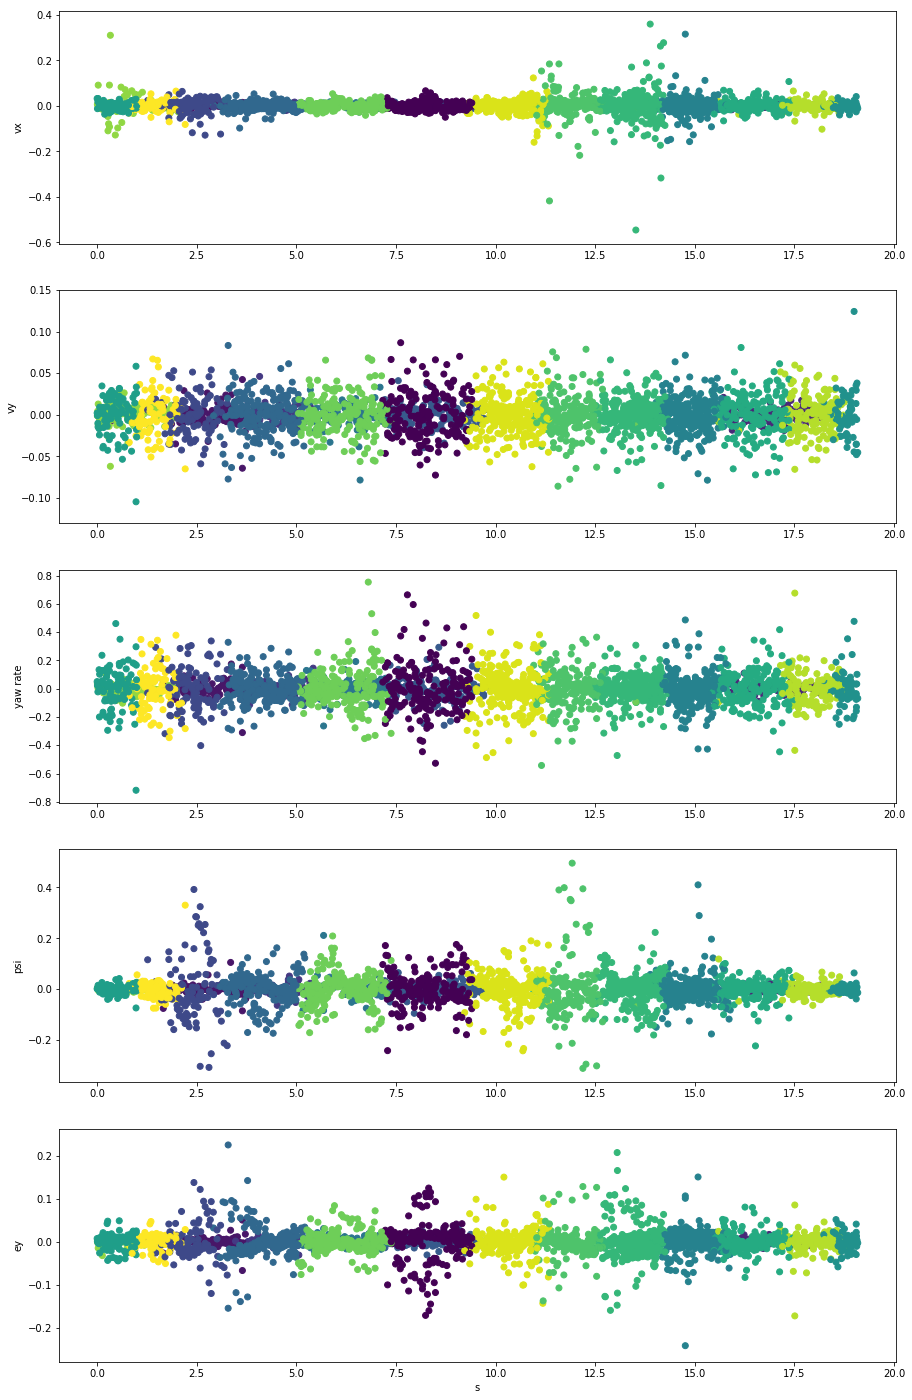

In [27]:
for j in range(len(nc_list)):
    yhats_ind = []; yhats = []
    yhats_ind_first = []; yhats_first = []

    for i in range(z.shape[0]):
        yhat = thetas[j][int(cluster_labels[j][i])].T.dot(np.hstack([z[i], 1]))
        yhat_first = thetas_first[j][int(cluster_labels_first[j][i])].T.dot(np.hstack([z[i], 1]))
        yhats_ind.append(yhat[y_ind]);yhats.append(yhat)
        yhats_ind_first.append(yhat_first[y_ind]);yhats_first.append(yhat_first)
    
    prediction_errors_first = y - np.array(yhats_first)
    prediction_errors = y - np.array(yhats)

    plt.figure(figsize=(15,30))
    nstates = prediction_errors.shape[1]
    state_names = ['vx', 'vy', 'yaw rate', 'psi', 'ey', 's']
    for state in range(nstates-1):
        plt.subplot(nstates, 1, state+1)
        #plt.plot(z[:,5],prediction_errors[:,state])
        plt.scatter(z[:,5], prediction_errors[:,state], c=cluster_labels[j])
        plt.ylabel(state_names[state])
        if state == nstates-2:
            plt.xlabel('s')



In [33]:
len(cluster_labels)

2930

In [34]:
prediction_errors.shape

(2930, 6)